- Récupérer le dataset de akinator.
- Tracer la taille des pieds (que l'on appelera y_mes) en fonction de la taille (que l'on appelera x).
- Ajouter la colonne y1 = a1 x + b1 avec a1 = 0.4 et b1 = -27
- Ajouter la colonne y2 = a2 x + b2 avec a2 = 0.9 et b2 = -120
- Tracer la droite y1 = a1 x + b2 avec a1 = 0.4 et b1 = -27
- Tracer la droite y2 = a2 x + b2 avec a2 = 0.9 et b2 = -120
- Calculer le R2 associé aux colonne y_mes et y1
- Calculer le R2 associé aux colonne y_mes et y2
- Lequel est le plus grand?
- Tracer la droite de régression linéaire grace à la fonction regplot de Seaborn
- Utiliser statsmodels.api pour déterminer les coefficient a et b de la fonction y = a x + b https://www.statsmodels.org/stable/regression.html
- Optionnel: Pour a compris entre [-1, 9] et b compris [0, 10], calculer R2
- Tracer R2 sur un graphique en 3D en fonction de a et b :
  - https://matplotlib.org/2.0.2/mpl_toolkits/mplot3d/tutorial.html
  - https://matplotlib.org/2.0.2/mpl_examples/mplot3d/surface3d_demo.py

In [231]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from seaborn import regplot
import numpy as np
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from matplotlib import cm

In [232]:
# Récupérer le dataset de akinator.

df = pd.read_csv('akinator.csv')

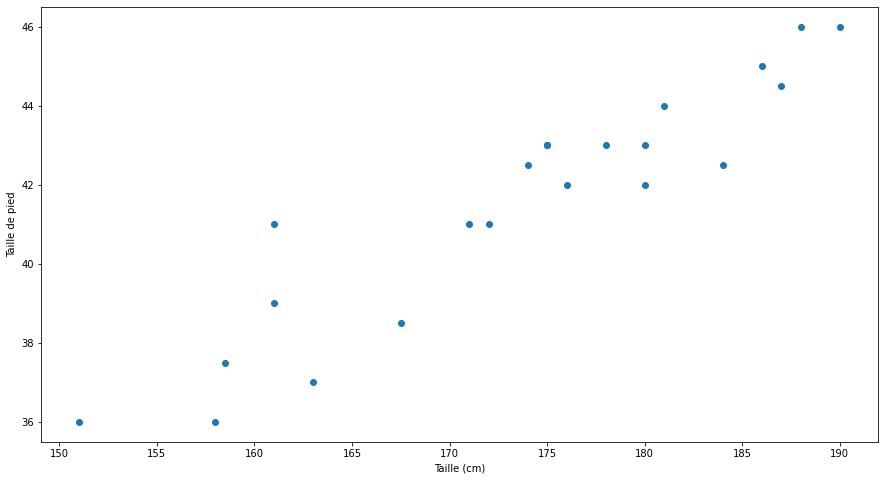

In [233]:
# Tracer la taille des pieds (que l'on appelera y_mes) en fonction de la taille (que l'on appelera x).

x = df['Taille (cm)'].tolist()
y_mes = df['Taille de pied'].tolist()

plt.figure(figsize=(15, 8))
plt.scatter(x, y_mes)
plt.xlabel('Taille (cm)')
plt.ylabel('Taille de pied')
plt.show()

In [234]:
# Ajouter la colonne y1 = a1 x + b1 avec a1 = 0.4 et b1 = -27

df['y1'] = df['Taille (cm)'].apply(lambda x: 0.4*x-27)
y1 = df['y1'].tolist()

In [235]:
# Ajouter la colonne y2 = a2 x + b2 avec a2 = 0.9 et b2 = -120

df['y2'] = df['Taille (cm)'].apply(lambda x: 0.9*x-120)
y2 = df['y2'].tolist()

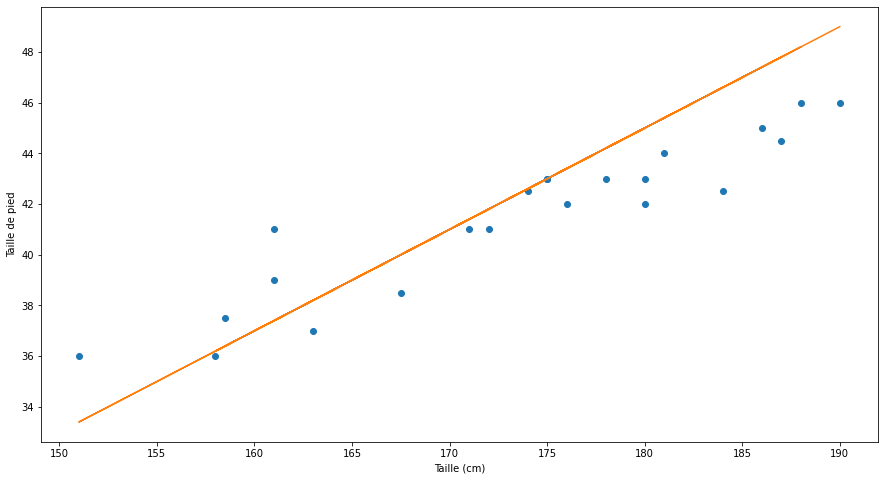

In [236]:
# Tracer la droite y1 = a1 x + b2 avec a1 = 0.4 et b1 = -27

plt.figure(figsize=(15, 8))
plt.scatter(x, y_mes)
plt.plot(x, y1, 'C1')
plt.xlabel('Taille (cm)')
plt.ylabel('Taille de pied')
plt.show()

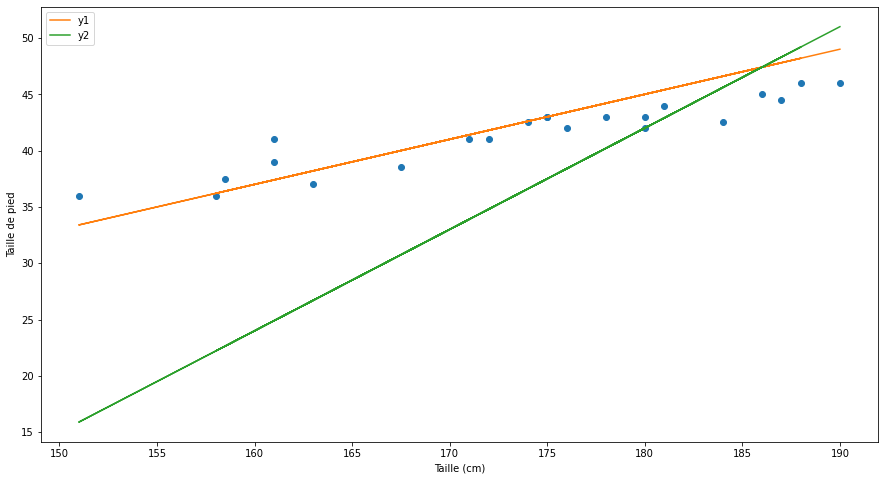

In [237]:
# Tracer la droite y2 = a2 x + b2 avec a2 = 0.9 et b2 = -120

plt.figure(figsize=(15, 8))
plt.scatter(x, y_mes)
plt.plot(x, y1, 'C1', label='y1')
plt.plot(x, y2, 'C2', label='y2')
plt.xlabel('Taille (cm)')
plt.ylabel('Taille de pied')
plt.legend()
plt.show()

In [238]:
# Calculer le R2 associé aux colonne y_mes et y1

R2_y1 = r2_score(y_mes, y1)
R2_y1

0.5126369923745342

In [239]:
# Calculer le R2 associé aux colonne y_mes et y2

R2_y2 = r2_score(y_mes, y2)
R2_y2

-7.9022947331087

In [240]:
# Lequel est le plus grand?

l = [R2_y1, R2_y2]
print(f'Le R2 de y{l.index(max(l))+1} est le plus grand.')

Le R2 de y1 est le plus grand.


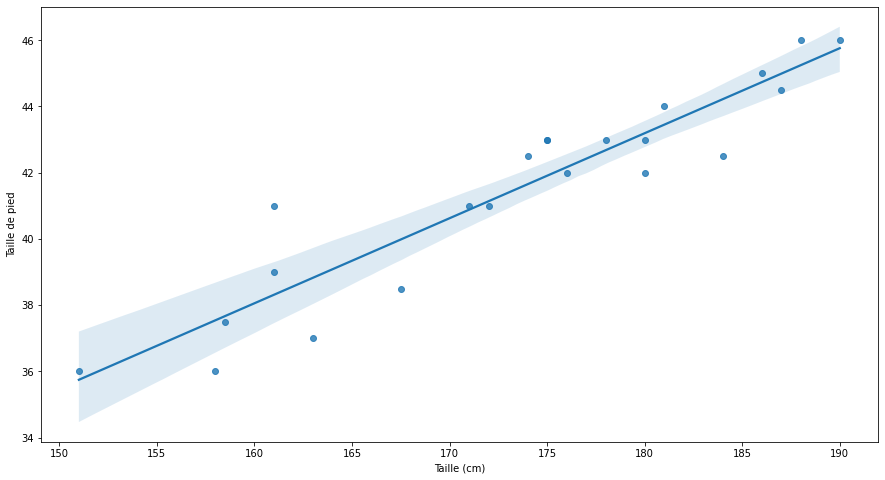

In [241]:
# Tracer la droite de régression linéaire grace à la fonction regplot de Seaborn

plt.figure(figsize=(15, 8))
regplot(x='Taille (cm)', y='Taille de pied', data=df)
plt.show()

In [242]:
# Utiliser statsmodels.api pour déterminer les coefficient a et b de la fonction y = a x + b

x = add_constant(df['Taille (cm)'])  
result = sm.OLS(y_mes, x).fit()
a = result.params[1]
b = result.params[0]
print(f'a = {a}\nb = {b}')

a = 0.2567859952793076
b = -3.029642908232578


In [243]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     136.2
Date:                Wed, 23 Nov 2022   Prob (F-statistic):           2.23e-10
Time:                        16:09:24   Log-Likelihood:                -32.455
No. Observations:                  22   AIC:                             68.91
Df Residuals:                      20   BIC:                             71.09
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -3.0296      3.825     -0.792      

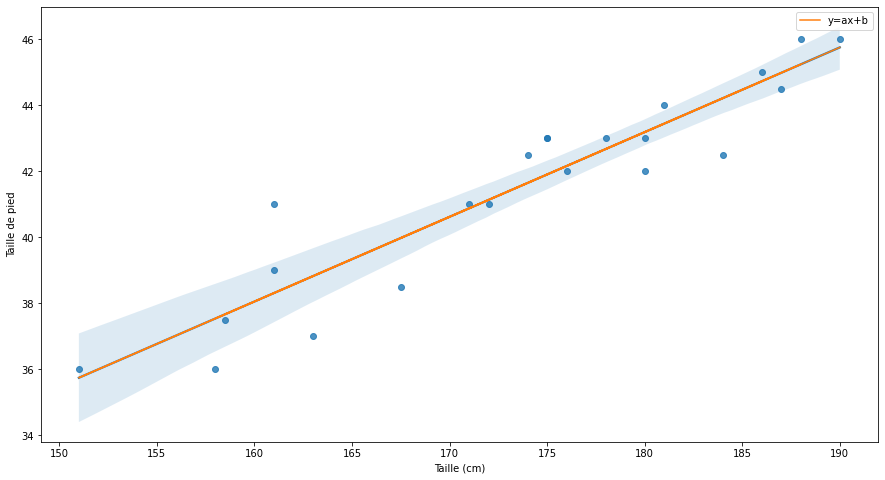

In [244]:
plt.figure(figsize=(15, 8))
regplot(x='Taille (cm)', y='Taille de pied', data=df)
plt.plot(df['Taille (cm)'], df['Taille (cm)'].apply(lambda x: a*x+b), label='y=ax+b')
plt.legend()
plt.show()

In [245]:
# Optionnel: Pour a compris entre [-1, 9] et b compris [0, 10], calculer R2

def R2_calc(a, b) : return r2_score(y_mes, a*df['Taille (cm)']+b)

A = np.arange(0.200, 0.300, 0.001)
B = np.arange(-12, 7, 0.1)
A, B = np.meshgrid(A, B)
R2 = A.copy()

for i in range(len(A)):
    for j in range(len(A[i])):
        R2[i][j] = R2_calc(A[i][j], B[i][j])

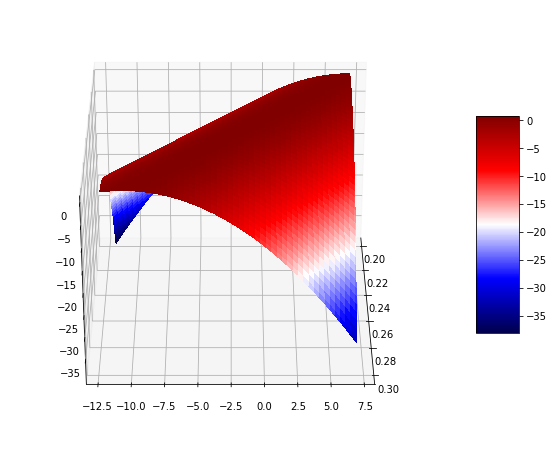

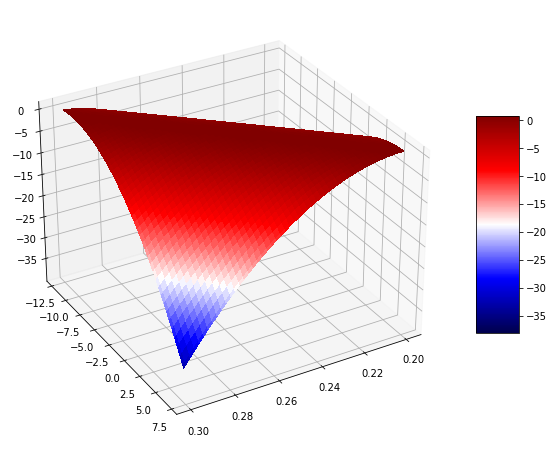

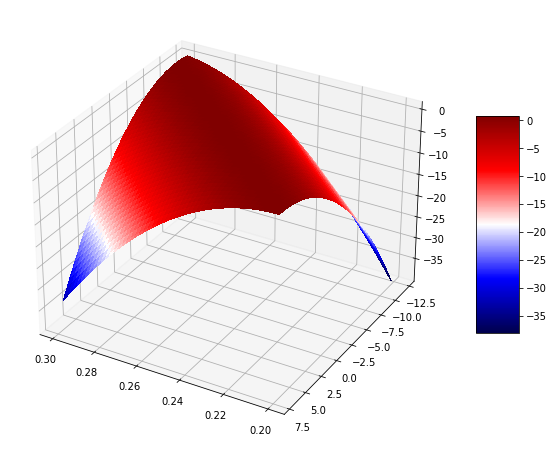

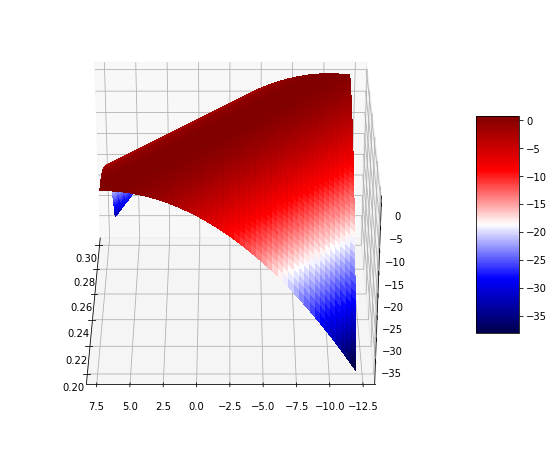

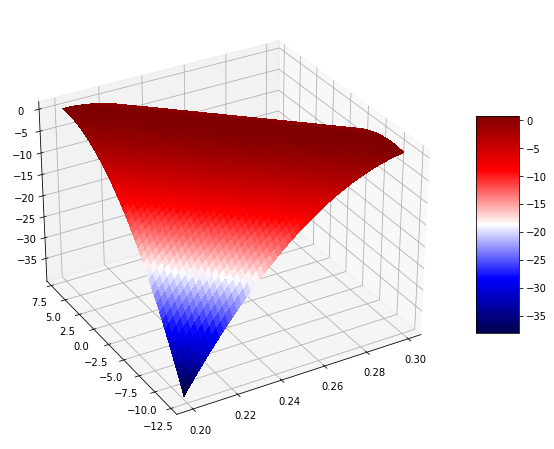

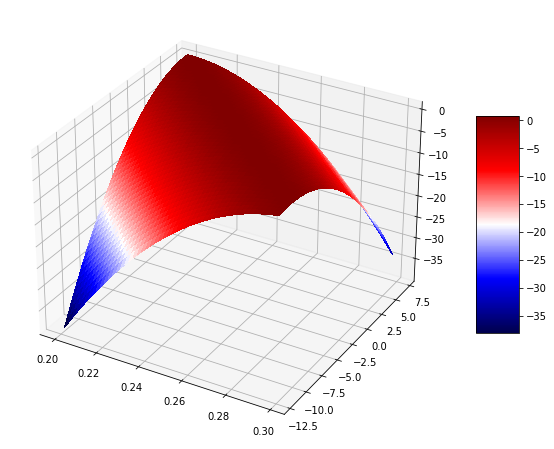

In [246]:
# Tracer R2 sur un graphique en 3D en fonction de a et b

for angle in range(0, 360, 60):
    fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(12, 8))
    surf = ax.plot_surface(A, B, R2, cmap=cm.seismic, antialiased=False)
    ax.view_init(30, angle)
    fig.colorbar(surf, shrink=0.5, aspect=5)
    fig.show()